<a href="https://colab.research.google.com/github/Berkay86/DeepPerson/blob/main/KR%C4%B0PPTODENEME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from math import exp
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [55]:

veriler=pd.read_csv("Ethereum Geçmiş Veriler - Investing.com.csv")
veriler=veriler[["Açılış","Yüksek","Düşük","Simdi","Tur"]]
#pd.read_csv("veriler.csv")
#test
print(veriler)

x = veriler.iloc[:,1:4].values #bağımsız değişkenler
y = veriler.iloc[:,4:].values #bağımlı değişken
print(y)

#verilerin egitim ve test icin bolunmesi
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.50, random_state=0)

#verilerin olceklenmesi
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)
logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train)

y_pred = logr.predict(X_test)
print(y_pred)
print(y_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)



from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print(cm)



from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print('SVC')
print(cm)



from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print('GNB')
print(cm)


from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy')

dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print('DTC')
print(cm)


from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion = 'entropy')
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('RFC')
print(cm)


    
# 7. ROC , TPR, FPR değerleri 

y_proba = rfc.predict_proba(X_test)
print(y_test)
print(y_proba[:,0])

from sklearn import metrics
fpr , tpr , thold = metrics.roc_curve(y_test,y_proba[:,0],pos_label='e')
print(fpr)
print(tpr)










        Açılış      Yüksek      Düşük      Simdi      Tur
0      1295.69   1302.6100  1255.9500  1258.8100  Eteryum
1      1276.05   1295.8000  1266.1600  1295.6900  Eteryum
2      1294.40   1295.8200  1263.5800  1276.0500  Eteryum
3      1294.40   1304.9700  1213.4400  1294.4100  Eteryum
4      1294.40   1226.3500  1159.7200  1216.5500  Eteryum
...        ...         ...        ...        ...      ...
10837  1294.40  10000.0000     0.9997     0.9999  Binance
10838  1294.40  10000.0000     0.9997     0.9999  Binance
10839  1294.40      0.9999     0.9996     0.9998  Binance
10840  1294.40      0.9998     0.9996     0.9997  Binance
10841  1294.40  10000.0000     0.9996     0.9997  Binance

[10842 rows x 5 columns]
[['Eteryum']
 ['Eteryum']
 ['Eteryum']
 ...
 ['Binance']
 ['Binance']
 ['Binance']]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ra

['Bitcoin' 'Dogecoin' 'Bitcoin' ... 'Bitcoin' 'Dogecoin' 'Dogecoin']
[['Bitcoin']
 ['Dogecoin']
 ['Bitcoin']
 ...
 ['Bitcoin']
 ['BNB']
 ['Dogecoin']]
[[   1    0  326  577    0    0    0]
 [   0    0   54   68    0   87    0]
 [   4    0 1674  553    0    5    0]
 [   0    0    0  997    0    0    0]
 [   0    0   14    0    0    0    0]
 [   0    0  489  111    0  444    0]
 [   0    0   10    0    0    7    0]]
[[ 655    0  249    0    0    0    0]
 [   0  147    0    0    0   62    0]
 [ 282    5 1928    3   11    7    0]
 [   0    0    6  991    0    0    0]
 [   0    0    7    0    7    0    0]
 [   0   69    6    0    0  958   11]
 [   0    3    0    0    0   13    1]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC
[[   0    0  205  699    0    0    0]
 [   0    0    0   68    0  141    0]
 [   0    0 1282  719    0  235    0]
 [   0    0    0  997    0    0    0]
 [   0    0   14    0    0    0    0]
 [   0    0    0  111    0  933    0]
 [   0    0    0    0    0   17    0]]
GNB
[[904   0   0   0   0   0   0]
 [  0   0   0  68   0   5 136]
 [971 132 411  95  74 553   0]
 [  0   0   0 997   0   0   0]
 [  0   0   0   0  14   0   0]
 [  0   0   1 111   0 343 589]
 [  0   0   0   0   0   3  14]]
DTC
[[ 653    0  251    0    0    0    0]
 [   0  161    0    0    0   46    2]
 [ 280    2 1942    1    5    6    0]
 [   0    0    6  991    0    0    0]
 [   0    0    7    0    7    0    0]
 [   0  118    7    0    0  913    6]
 [   0    4    0    0    0   13    0]]
RFC
[[ 718    0  186    0    0    0    0]
 [   0  159    0    0    0   49    1]
 [ 295    5 1925    1    5    5    0]
 [   0    0    8  989    0    0    0]
 [   0    0    8    0    6    0    0]
 [   0   76    6    0    0  961    1]
 [  

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-55-045e59703d46>:84: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


[['Bitcoin']
 ['Dogecoin']
 ['Bitcoin']
 ...
 ['Bitcoin']
 ['BNB']
 ['Dogecoin']]
[0. 0. 0. ... 0. 1. 0.]
[0.         0.06437927 0.09297178 0.11621472 0.13890426 0.16196274
 0.18686589 0.20789522 0.22855562 0.25290537 0.28223575 1.        ]
[nan nan nan nan nan nan nan nan nan nan nan nan]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


In [43]:
veriler=veriler[["Açılış","Yüksek","Düşük","Simdi"]]
veriler

,Açılış,Yüksek,Düşük,Simdi
0,1.0,10000.0,1.0,1.0
1,1.0,10000.0,1.0,1.0
2,1.0,10001.0,1.0,10000.0
3,10003.0,10005.0,1.0,1.0
4,10003.0,10005.0,10003.0,10003.0
...,...,...,...,...
6793,15.1,15.1,11.4,12.5
6794,12.9,15.1,12.9,15.1
6795,12.0,13.5,12.0,12.9
6796,11.8,12.0,11.8,12.0


In [65]:

from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print('SVC')
print(cm)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC
[[   0    0  205  699    0    0    0]
 [   0    0    0   68    0  141    0]
 [   0    0 1282  719    0  235    0]
 [   0    0    0  997    0    0    0]
 [   0    0   14    0    0    0    0]
 [   0    0    0  111    0  933    0]
 [   0    0    0    0    0   17    0]]


In [58]:
columns=["y_test","y_pred"]
df = pd.DataFrame(list(zip(y_test,y_pred)), columns=columns)
df.to_excel('saved.xlsx')

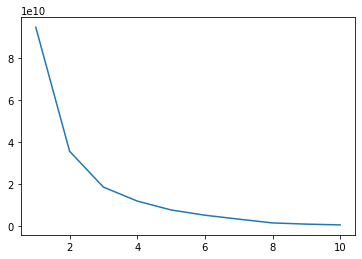

In [66]:
plt.plot(range(1,11),sonuclar)

In [64]:
X=veriler.iloc[:,1:4]
from sklearn.cluster import AgglomerativeClustering
ac=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage='ward')
Y_Tahmin=ac.fit_predict(X)
print(Y_Tahmin)


[0 0 0 ... 0 0 0]


In [ ]:

veriler=pd.read_csv("Ethereum Geçmiş Veriler - Investing.com.csv")
veriler=veriler[["Açılış","Yüksek","Düşük","Simdi","Tur"]]
#pd.read_csv("veriler.csv")
#test
print(veriler)

x = veriler.iloc[:,1:4].values #bağımsız değişkenler
y = veriler.iloc[:,4:].values #bağımlı değişken
print(y)

#verilerin egitim ve test icin bolunmesi
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(x,y,test_size=0.50, random_state=0)

#verilerin olceklenmesi
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)
logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train)

y_pred = logr.predict(X_test)
print(y_pred)
print(y_test)


from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)



from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn.fit(X_train,y_train)

y_pred = knn.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print(cm)



from sklearn.svm import SVC
svc = SVC(kernel='rbf')
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print('SVC')
print(cm)



from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print('GNB')
print(cm)


from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion = 'entropy')

dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

cm = confusion_matrix(y_test,y_pred)
print('DTC')
print(cm)


from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion = 'entropy')
rfc.fit(X_train,y_train)

y_pred = rfc.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
print('RFC')
print(cm)


    
# 7. ROC , TPR, FPR değerleri 

y_proba = rfc.predict_proba(X_test)
print(y_test)
print(y_proba[:,0])

from sklearn import metrics
fpr , tpr , thold = metrics.roc_curve(y_test,y_proba[:,0],pos_label='e')
print(fpr)
print(tpr)










        Açılış      Yüksek      Düşük      Simdi      Tur
0      1295.69   1302.6100  1255.9500  1258.8100  Eteryum
1      1276.05   1295.8000  1266.1600  1295.6900  Eteryum
2      1294.40   1295.8200  1263.5800  1276.0500  Eteryum
3      1294.40   1304.9700  1213.4400  1294.4100  Eteryum
4      1294.40   1226.3500  1159.7200  1216.5500  Eteryum
...        ...         ...        ...        ...      ...
10837  1294.40  10000.0000     0.9997     0.9999  Binance
10838  1294.40  10000.0000     0.9997     0.9999  Binance
10839  1294.40      0.9999     0.9996     0.9998  Binance
10840  1294.40      0.9998     0.9996     0.9997  Binance
10841  1294.40  10000.0000     0.9996     0.9997  Binance

[10842 rows x 5 columns]
[['Eteryum']
 ['Eteryum']
 ['Eteryum']
 ...
 ['Binance']
 ['Binance']
 ['Binance']]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ra

['Bitcoin' 'Dogecoin' 'Bitcoin' ... 'Bitcoin' 'Dogecoin' 'Dogecoin']
[['Bitcoin']
 ['Dogecoin']
 ['Bitcoin']
 ...
 ['Bitcoin']
 ['BNB']
 ['Dogecoin']]
[[   1    0  326  577    0    0    0]
 [   0    0   54   68    0   87    0]
 [   4    0 1674  553    0    5    0]
 [   0    0    0  997    0    0    0]
 [   0    0   14    0    0    0    0]
 [   0    0  489  111    0  444    0]
 [   0    0   10    0    0    7    0]]
[[ 655    0  249    0    0    0    0]
 [   0  147    0    0    0   62    0]
 [ 282    5 1928    3   11    7    0]
 [   0    0    6  991    0    0    0]
 [   0    0    7    0    7    0    0]
 [   0   69    6    0    0  958   11]
 [   0    3    0    0    0   13    1]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC
[[   0    0  205  699    0    0    0]
 [   0    0    0   68    0  141    0]
 [   0    0 1282  719    0  235    0]
 [   0    0    0  997    0    0    0]
 [   0    0   14    0    0    0    0]
 [   0    0    0  111    0  933    0]
 [   0    0    0    0    0   17    0]]
GNB
[[904   0   0   0   0   0   0]
 [  0   0   0  68   0   5 136]
 [971 132 411  95  74 553   0]
 [  0   0   0 997   0   0   0]
 [  0   0   0   0  14   0   0]
 [  0   0   1 111   0 343 589]
 [  0   0   0   0   0   3  14]]
DTC
[[ 653    0  251    0    0    0    0]
 [   0  161    0    0    0   46    2]
 [ 280    2 1942    1    5    6    0]
 [   0    0    6  991    0    0    0]
 [   0    0    7    0    7    0    0]
 [   0  118    7    0    0  913    6]
 [   0    4    0    0    0   13    0]]
RFC
[[ 718    0  186    0    0    0    0]
 [   0  159    0    0    0   49    1]
 [ 295    5 1925    1    5    5    0]
 [   0    0    8  989    0    0    0]
 [   0    0    8    0    6    0    0]
 [   0   76    6    0    0  961    1]
 [  

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-55-045e59703d46>:84: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfc.fit(X_train,y_train)


[['Bitcoin']
 ['Dogecoin']
 ['Bitcoin']
 ...
 ['Bitcoin']
 ['BNB']
 ['Dogecoin']]
[0. 0. 0. ... 0. 1. 0.]
[0.         0.06437927 0.09297178 0.11621472 0.13890426 0.16196274
 0.18686589 0.20789522 0.22855562 0.25290537 0.28223575 1.        ]
[nan nan nan nan nan nan nan nan nan nan nan nan]


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_ranking.py:999: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


[[1.29439834e+03 3.58026616e+03 2.48107140e+03 3.06085020e+03]
 [1.29440000e+03 1.74176300e+06 9.99100000e-01 1.00000000e+04]
 [1.29440000e+03 4.50129177e+04 4.24070338e+04 4.37952121e+04]]


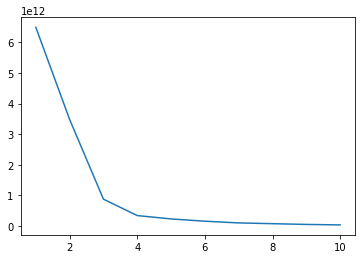

[0 0 0 ... 0 0 0]


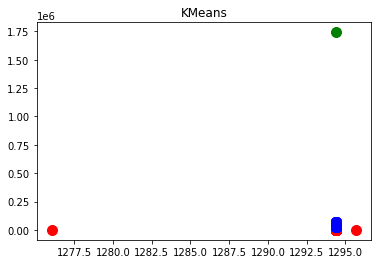

[0 0 0 ... 0 0 0]


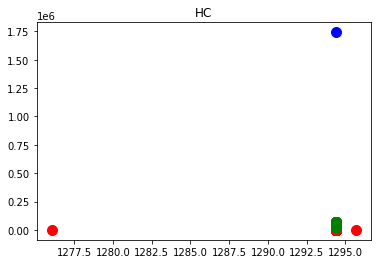

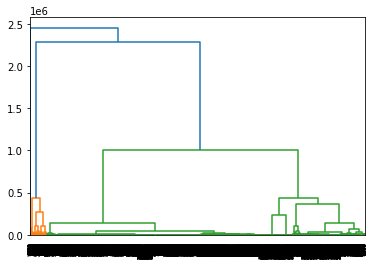

In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt




veriler=pd.read_csv("Ethereum Geçmiş Veriler - Investing.com.csv")
veriler=veriler[["Açılış","Yüksek","Düşük","Simdi","Tur"]]

X = veriler.iloc[:,:4].values

#kmeans

from sklearn.cluster import KMeans

kmeans = KMeans ( n_clusters = 3, init = 'k-means++')
kmeans.fit(X)

print(kmeans.cluster_centers_)
sonuclar = []
for i in range(1,11):
    kmeans = KMeans (n_clusters = i, init='k-means++', random_state= 123)
    kmeans.fit(X)
    sonuclar.append(kmeans.inertia_)

plt.plot(range(1,11),sonuclar)
plt.show()

kmeans = KMeans (n_clusters = 3, init='k-means++', random_state= 123)
Y_tahmin= kmeans.fit_predict(X)
print(Y_tahmin)  
plt.scatter(X[Y_tahmin==0,0],X[Y_tahmin==0,1],s=100, c='red')
plt.scatter(X[Y_tahmin==1,0],X[Y_tahmin==1,1],s=100, c='blue')
plt.scatter(X[Y_tahmin==2,0],X[Y_tahmin==2,1],s=100, c='green')
plt.scatter(X[Y_tahmin==3,0],X[Y_tahmin==3,1],s=100, c='yellow')
plt.title('KMeans')
plt.show()

#HC
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
Y_tahmin = ac.fit_predict(X)
print(Y_tahmin)

plt.scatter(X[Y_tahmin==0,0],X[Y_tahmin==0,1],s=100, c='red')
plt.scatter(X[Y_tahmin==1,0],X[Y_tahmin==1,1],s=100, c='blue')
plt.scatter(X[Y_tahmin==2,0],X[Y_tahmin==2,1],s=100, c='green')
plt.scatter(X[Y_tahmin==3,0],X[Y_tahmin==3,1],s=100, c='yellow')
plt.title('HC')
plt.show()

import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.show()


















In [74]:
	#1. kutuphaneler
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
import statsmodels.api as sm


In [134]:
veriler=pd.read_csv("Ethereum Geçmiş Veriler - Investing.com (1).csv")
veriler=veriler[["Açılış","Yüksek","Düşük","Şimdi"]]
x = veriler.iloc[:,1:3]
y = veriler.iloc[:,3]
X = x.values
Y = y.values

In [141]:
print(veriler.corr()) 

          Açılış    Yüksek     Düşük     Şimdi
Açılış  1.000000  0.999326  0.998491  0.998092
Yüksek  0.999326  1.000000  0.998395  0.999081
Düşük   0.998491  0.998395  1.000000  0.999067
Şimdi   0.998092  0.999081  0.999067  1.000000


In [142]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,Y)
model = sm.OLS(lin_reg.predict(X),X)
print(model.fit().summary())
print("Linear R2 degeri:")
print(r2_score(Y, lin_reg.predict((X))))


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.110e+10
Date:                Sat, 03 Dec 2022   Prob (F-statistic):                        0.00
Time:                        23:08:00   Log-Likelihood:                         -1658.7
No. Observations:                2460   AIC:                                      3321.
Df Residuals:                    2458   BIC:                                      3333.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [143]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(X)
print(x_poly)
lin_reg2 = LinearRegression()
lin_reg2.fit(x_poly,y)
model2 = sm.OLS(lin_reg2.predict(poly_reg.fit_transform(X)),X)
print(r2_score(Y, lin_reg2.predict(poly_reg.fit_transform(X)) ))


[[1.00000000e+00 1.30261000e+03 1.25595000e+03 ... 2.67653863e+12
  2.58066397e+12 2.48822358e+12]
 [1.00000000e+00 1.29580000e+03 1.26616000e+03 ... 2.69186410e+12
  2.63029067e+12 2.57012566e+12]
 [1.00000000e+00 1.29582000e+03 1.26358000e+03 ... 2.68098784e+12
  2.61428486e+12 2.54924146e+12]
 ...
 [1.00000000e+00 1.34500000e+01 1.19500000e+01 ... 2.58333293e+04
  2.29522888e+04 2.03925540e+04]
 [1.00000000e+00 1.19500000e+01 1.17500000e+01 ... 1.97156702e+04
  1.93857008e+04 1.90612539e+04]
 [1.00000000e+00 1.18500000e+01 1.10700000e+01 ... 1.72080612e+04
  1.60753787e+04 1.50172525e+04]]
0.9989958801707001


In [145]:
from sklearn.preprocessing import StandardScaler
sc1 = StandardScaler()
x_olcekli = sc1.fit_transform(X)
sc2 = StandardScaler()
y_olcekli = np.ravel(sc2.fit_transform(Y.reshape(-1,1)))
from sklearn.svm import SVR
svr_reg = SVR(kernel = 'rbf')
svr_reg.fit(x_olcekli,y_olcekli)
model3 = sm.OLS(svr_reg.predict(x_olcekli),x_olcekli)
print(model3.fit().summary())
print(r2_score(y_olcekli, svr_reg.predict(x_olcekli)) )


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.998
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                          5.818e+05
Date:                Sat, 03 Dec 2022   Prob (F-statistic):                        0.00
Time:                        23:08:25   Log-Likelihood:                          4105.2
No. Observations:                2460   AIC:                                     -8206.
Df Residuals:                    2458   BIC:                                     -8195.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [146]:
from sklearn.tree import DecisionTreeRegressor
r_dt = DecisionTreeRegressor(random_state=0)
r_dt.fit(X,Y)
print('Decision Tree OLS')
model4 = sm.OLS(r_dt.predict(X),X)
print(model4.fit().summary())
print("Decision Tree R2 degeri:")
print(r2_score(Y, r_dt.predict(X)) )


Decision Tree OLS
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.862e+06
Date:                Sat, 03 Dec 2022   Prob (F-statistic):                        0.00
Time:                        23:08:46   Log-Likelihood:                         -12352.
No. Observations:                2460   AIC:                                  2.471e+04
Df Residuals:                    2458   BIC:                                  2.472e+04
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [124]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 5, random_state=0)
rf_reg.fit(X,Y.ravel())
print('Random Forest OLS')
model5 = sm.OLS(rf_reg.predict(X),X)
print(model5.fit().summary())
print("Random Forest R2 degeri:")
print(r2_score(Y, rf_reg.predict(X)) )


Random Forest OLS
                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          3.175e+06
Date:                Sat, 03 Dec 2022   Prob (F-statistic):                        0.00
Time:                        23:04:06   Log-Likelihood:                         -11195.
No. Observations:                2460   AIC:                                  2.240e+04
Df Residuals:                    2457   BIC:                                  2.241e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------